# Predicting heart Disease Using Machine Learning

**This project was done to build a Machine Learning Model that can predict if a patient has heart diesease or not based on their medical data and other factors. I actually worked on this project a few years ago and I now want to try my hands on it again to see how far I have come**



In [1]:
# Importing tools
# Regular Exploratory Data Analysis(EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We want plots to appear in the notebook
%matplotlib inline

#Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score



## Information on the DataFrame

1.age-
age in years

2.sex-
(1 = male; 0 = female)


3.cp-
chest pain

4.trestbps-
resting blood pressure (in mm Hg on admission to the hospital)


5.chol-
serum cholestoral in mg/dl


6.fbs-
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)


7.restecg-
resting electrocardiographic results


8.thalach-
maximum heart rate achieved


9.exang-
exercise induced angina (1 = yes; 0 = no)


10.oldpeak-
ST depression induced by exercise relative to rest


11.slope-
the slope of the peak exercise ST segment

12.ca-
number of major vessels (0-3) colored by flourosopy


13.thal-
3 = normal; 6 = fixed defect; 7 = reversable defect


14.target-
1=Heart Disease or 0=No Heart Disease

Original Data can be retrieved from https://archive.ics.uci.edu/ml/datasets/heart+Disease

Also a Kaggle Version from
https://www.kaggle.com/ronitf/heart-disease-uci

## Load Data

In [98]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis (EDA)
* The Goal here is to find more about the data and know if there exists any relationship between columns


1. What Questions are you trying to solve
2. Kind of data and how to treat it
3. Are there any missing data and how to deal with it
4. Are there any outliers?How do we deal with that?
5. How to add,change or remove features to get more info from your data

In [72]:
df.target.value_counts() # Finding out how many of each class there are

,count
target,
1,165
0,138


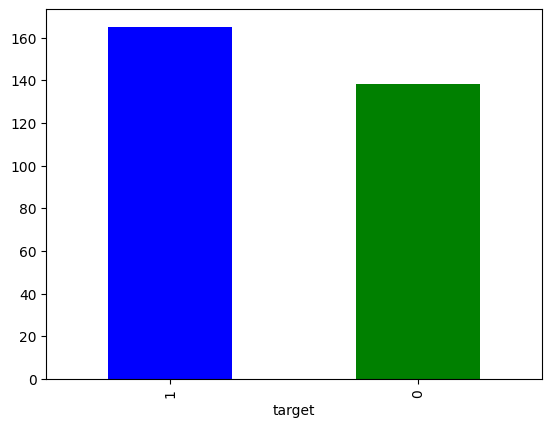

In [73]:
df.target.value_counts().plot(kind="bar",color=["Blue","Green"]);

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [75]:
df.isna().sum() #Missing Values?

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No null values

In [76]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [77]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [78]:
pd.crosstab(df.sex,df.target) #Comparing target and sex columns for some correlation

target,0,1
sex,,
0,24,72
1,114,93


Per our data,there is **roughly** a 75% chance of a female having heart disease,50% chance of a male having heart disease and a 60% chance of anyone having heart disease

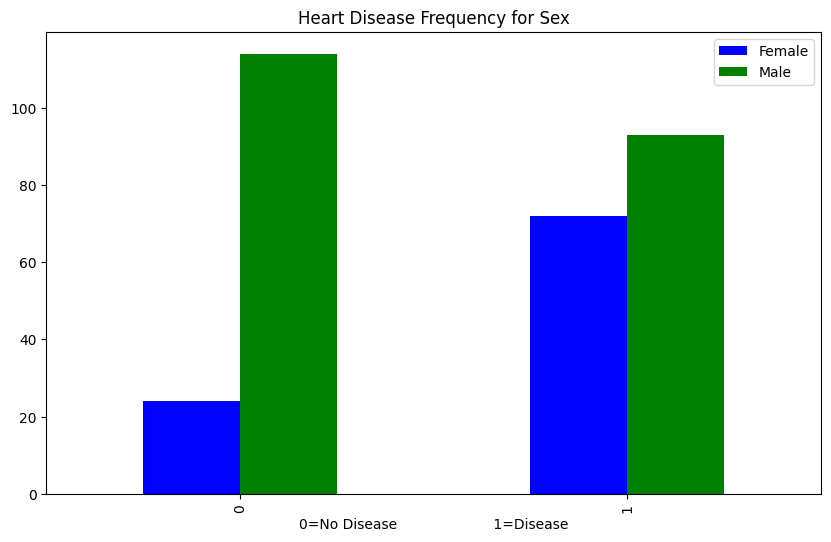

In [79]:
# Creating a plot for the crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["blue","green"])
plt.xlabel("0=No Disease                      1=Disease")
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female","Male"])

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Comparing Age and Thalach

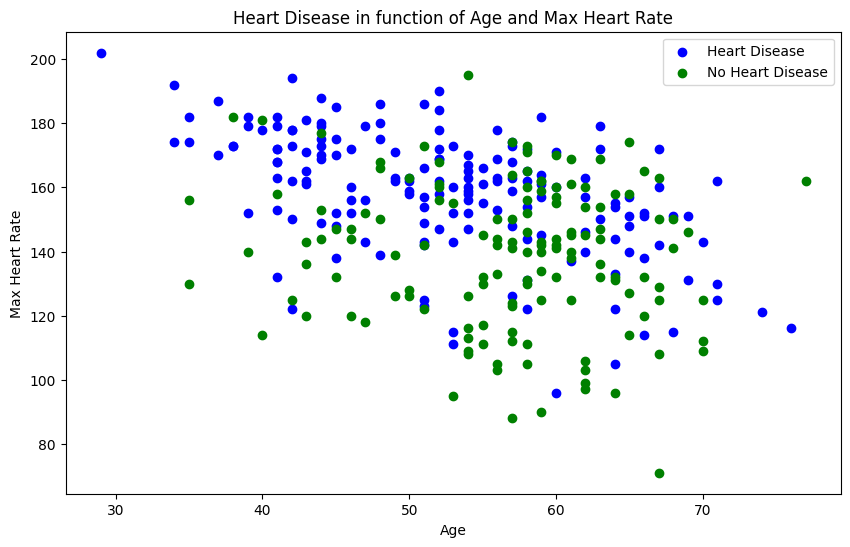

In [81]:
# Check the guide Above for what Thalach is
plt.figure(figsize=(10,6))
#Trying some positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],c='blue')

#Trying some negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],c="green")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"]);

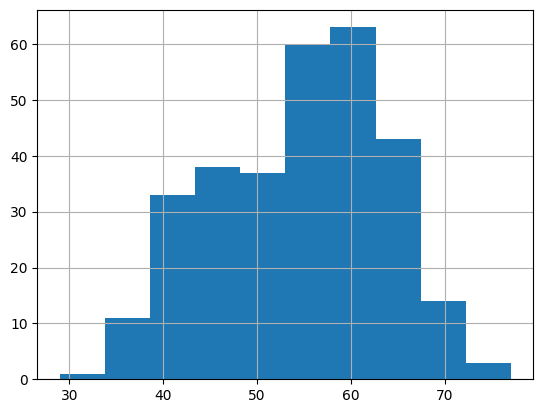

In [82]:
#Check the distribution of the age column with a histogram
df.age.hist();

Gladly no outliers over here

## Heart Disease Frquency per chest pain type

In [83]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


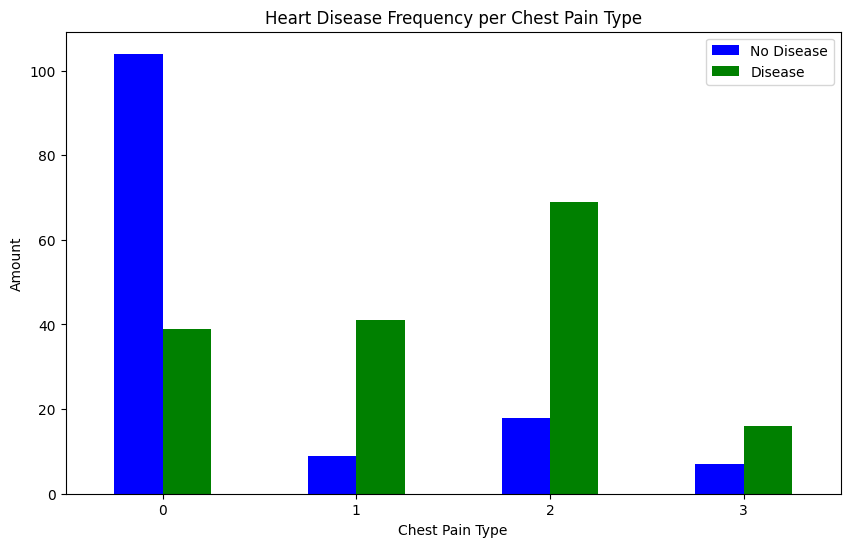

In [84]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),color=["blue","Green"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [85]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# This is complex to read.Why not visualize it?

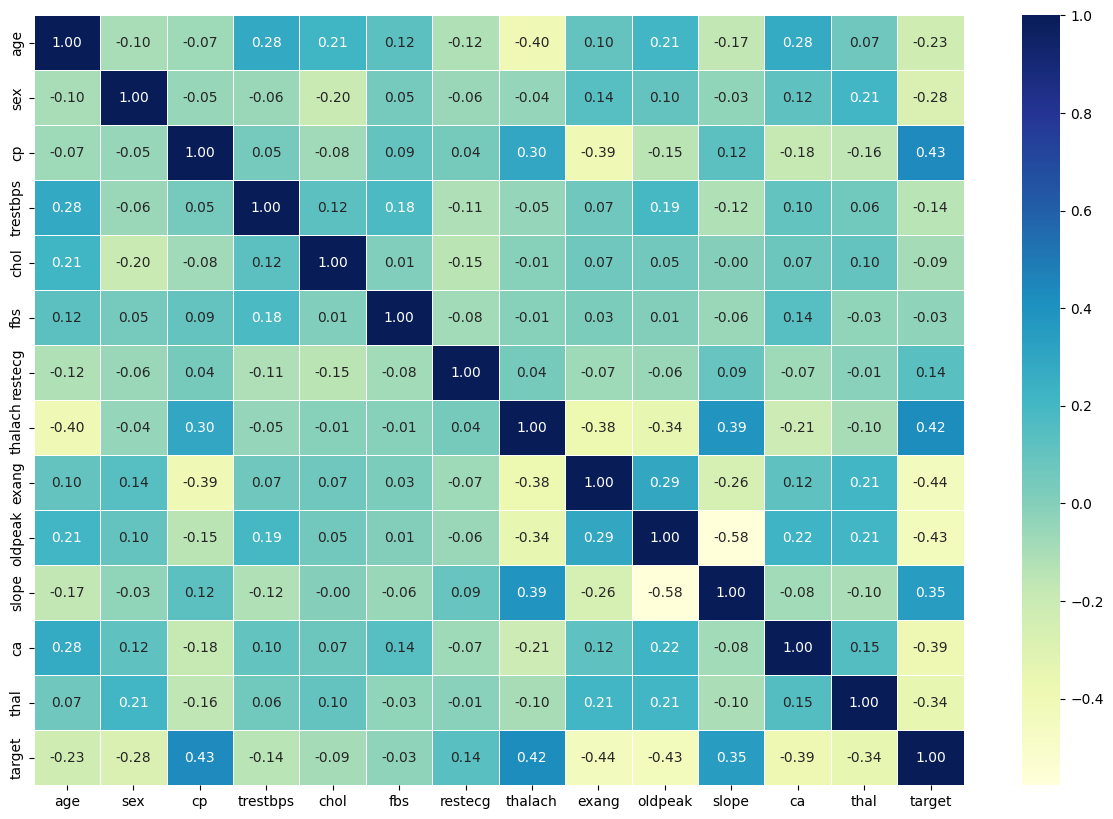

In [86]:
#Creating a heatmap with the data
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix
               ,annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## Modelling

In [99]:
#Split Data into x and y
X=df.drop("target",axis=1)

y=df["target"]

In [100]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [101]:
columns_for_ohe=["cp","restecg","exang","slope","ca","thal"]

In [102]:
numeric_features=["age","trestbps","chol","thalach","oldpeak"]

In [103]:
from sklearn.pipeline import Pipeline

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import joblib

ct = ColumnTransformer(
    transformers = [
        ("mm",MinMaxScaler(),numeric_features),
        ("ohe",OneHotEncoder(sparse_output = False, handle_unknown="ignore", drop = "first"),columns_for_ohe),
    ],
    remainder = "passthrough",
    verbose_feature_names_out = False
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('model', KNeighborsClassifier())
])

In [134]:
# Split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2)

In [135]:
# Fit pipeline first
knn_pipeline.fit(X_train, y_train)

# Transform X_train using the pipeline (everything up to the model)
X_pipeline_transformed = knn_pipeline.named_steps['preprocessor'].transform(X_train)

# Convert to DataFrame
feature_names = knn_pipeline.named_steps['preprocessor'].get_feature_names_out()
X_pipeline_transformed_df = pd.DataFrame(X_pipeline_transformed, columns=feature_names, index=X_train.index)


In [136]:
X_pipeline_transformed_df.head()

,age,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,restecg_1,restecg_2,...,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,sex,fbs
132,0.270833,0.265306,0.378753,0.649123,0.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
202,0.604167,0.571429,0.321016,0.201754,0.142857,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
196,0.354167,0.571429,0.230947,0.517544,0.642857,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
75,0.541667,0.418367,0.274827,0.640351,0.250000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
176,0.645833,0.234694,0.228637,0.631579,0.250000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


 We will try 3 different Machine Learning Models
 * Logistic Regression
 * K-Nearest Neighbors Classifier
 * Random Forest Classifier

 **All these shall be put in a function to avoid repetition of code**

In [137]:
# Put models in a dictionary
models={ "Logistic Regression": Pipeline([
        ('preprocessor', ct),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    "KNN": knn_pipeline,
    "Random Forest": Pipeline([
        ('preprocessor', ct),
        ('model', RandomForestClassifier())
    ])}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and scores given Machine Learning Models.
    models : A dict of different Sckit-Learn Machine Learning Models
    X_train : Training Data (No labels)
    X_test : Testing Data (No labels)
    y_train : Training Labels
    y_test : Test Labels
    """
    np.random.seed(42)
    model_scores={}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [138]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [139]:
X_test.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [140]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.8360655737704918,
 'Random Forest': 0.8524590163934426}

# Model Comparison

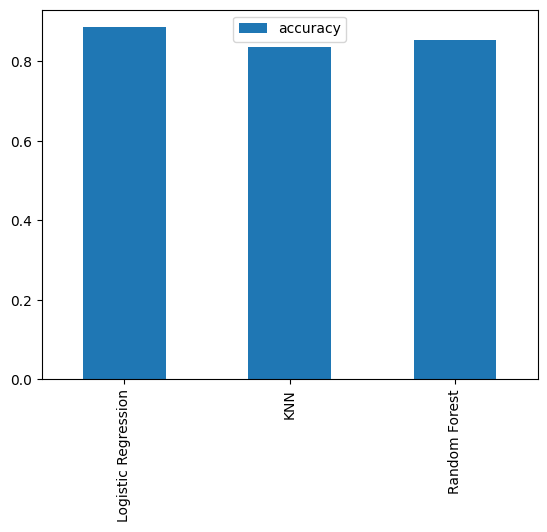

In [141]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

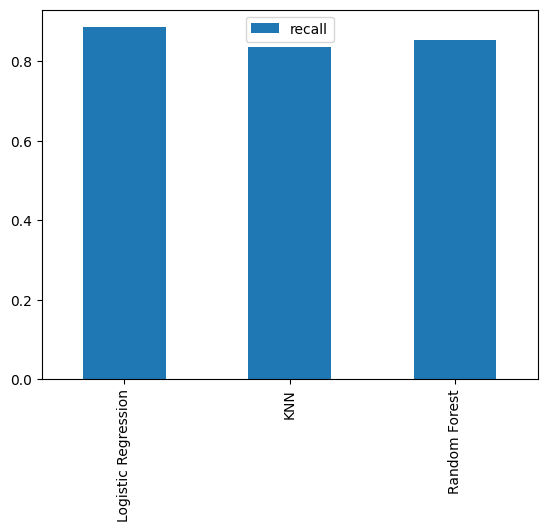

In [142]:
model_compare=pd.DataFrame(model_scores,index=["recall"])
model_compare.T.plot.bar();

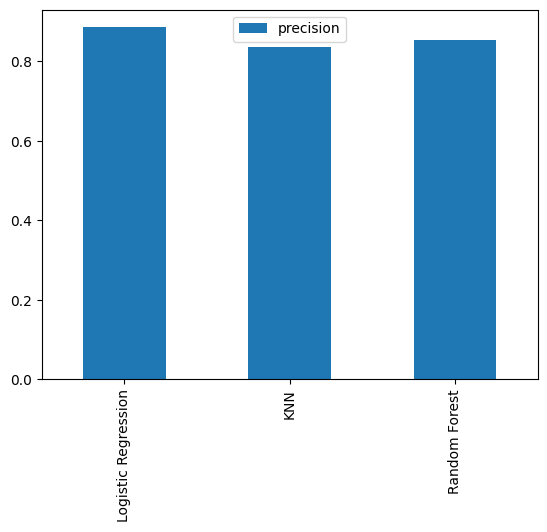

In [143]:
model_compare=pd.DataFrame(model_scores,index=["precision"])
model_compare.T.plot.bar();

# Tuning the Model

We know baseline models might not always be the final models.Time for tuning

We will look at the following :

* Hyperparameter Tuning
* feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)

# Hyperparamter Tuning for KNN (By Hand)

In [144]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for k in neighbors:
    # Update number of neighbors in the pipeline
    knn_pipeline.set_params(model__n_neighbors=k)

    # Fit the pipeline
    knn_pipeline.fit(X_train, y_train)

    # Append scores
    train_scores.append(knn_pipeline.score(X_train, y_train))
    test_scores.append(knn_pipeline.score(X_test, y_test))

In [145]:
train_scores

[1.0,
 0.9049586776859504,
 0.8925619834710744,
 0.8553719008264463,
 0.8512396694214877,
 0.8305785123966942,
 0.8264462809917356,
 0.8264462809917356,
 0.8305785123966942,
 0.8347107438016529,
 0.8181818181818182,
 0.8264462809917356,
 0.8140495867768595,
 0.8181818181818182,
 0.8099173553719008,
 0.8181818181818182,
 0.8099173553719008,
 0.8181818181818182,
 0.8140495867768595,
 0.8099173553719008]

In [146]:
test_scores

[0.8360655737704918,
 0.7540983606557377,
 0.8032786885245902,
 0.7540983606557377,
 0.8360655737704918,
 0.8360655737704918,
 0.8688524590163934,
 0.8524590163934426,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934]

Maximum KNN score on the test data: 88.52%


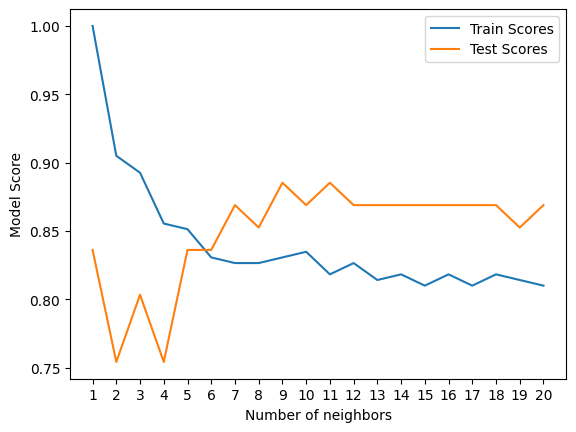

In [147]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


KNN has improved from 85 to 88. This is the same level as Logistic Regression
base model. We can also see that the best number of neighbours for this is
9

## Logistic Regression and Random Forest Regressor Hyperparameter Tuning with RandomizedSearchCV

Tuning:
* LogisticRegression()
* RandomForestClassifier()
#### Using RandomizedSearchCV

In [148]:
# Create a Hyperparameter Grid for Logistic regresssion
log_reg_grid={
    "model__C": np.logspace(-4,1,200)
}

In [149]:
lr_pipeline =Pipeline([
        ('preprocessor', ct),
        ('model', LogisticRegression(max_iter=1000))
    ])


rf_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model', RandomForestClassifier())
])

In [150]:
# Tune Logistic Regression
np.random.seed(42)
# Setup random Hyperparameter search for Logistic Regression
rs_log_reg=RandomizedSearchCV(lr_pipeline,
                              param_distributions=log_reg_grid,
                              n_iter=200,verbose=True,refit=True)

# Fit random Hyperparameter search for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('mm',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'trestbps',
                                                                                'chol',
                                                                                'thalach',
                                                                                'oldpeak']),
                                                                              ('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['cp',
                                                                                'restecg',
                                                                                'exang',
                                                                                'slope',
                                                                                'ca',
                                                                                'thal'])],
                                                                verbose_feature_names_out=False)),
                                             ('mod...
       2.64308149e+00, 2.80050389e+00, 2.96730241e+00, 3.14403547e+00,
       3.33129479e+00, 3.52970730e+00, 3.73993730e+00, 3.96268864e+00,
       4.19870708e+00, 4.44878283e+00, 4.71375313e+00, 4.99450512e+00,
       5.29197874e+00, 5.60716994e+00, 5.94113398e+00, 6.29498899e+00,
       6.66991966e+00, 7.06718127e+00, 7.48810386e+00, 7.93409667e+00,
       8.40665289e+00, 8.90735464e+00, 9.43787828e+00, 1.00000000e+01])},
                   verbose=True)

In [152]:
rs_log_reg.best_params_

{'model__C': np.float64(5.607169938205458)}

In [151]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [153]:
rf_grid = {
    "model__n_estimators": np.arange(10, 500, 10),
    "model__max_depth": [None, 5, 8, 12, 16, 20],
    "model__min_samples_split": np.arange(2, 20, 2),
    "model__min_samples_leaf": np.arange(1, 20, 2)
}

In [154]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(rf_pipeline,
                         param_distributions=rf_grid,
                        n_iter=200,
                        verbose=True,refit=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('mm',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'trestbps',
                                                                                'chol',
                                                                                'thalach',
                                                                                'oldpeak']),
                                                                              ('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['cp',
                                                                                'restecg',
                                                                                'exang',
                                                                                'slope',
                                                                                'ca',
                                                                                'thal'])],
                                                                verbose_feature_names_out=False)),
                                             ('mod...
                                        'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'model__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'model__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   verbose=True)

In [155]:
rs_rf.best_params_

{'model__n_estimators': np.int64(20),
 'model__min_samples_split': np.int64(12),
 'model__min_samples_leaf': np.int64(9),
 'model__max_depth': 5}

In [156]:
rs_rf.score(X_test,y_test)

0.8688524590163934

The RandomForest has improved by 3% but it is still not as good as the logistic regression model

Let me try improving the KNN

In [157]:
knn_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('mm', MinMaxScaler(),
                                    ['age', 'trestbps', 'chol', 'thalach',
                                     'oldpeak']),
                                   ('ohe',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['cp', 'restecg', 'exang', 'slope', 'ca',
                                     'thal'])],
                     verbose_feature_names_out=False)),
  ('model', KNeighborsClassifier(n_neighbors=20))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('mm', MinMaxScaler(),
                                  ['age', 'trestbps', 'chol', 'thalach',
    

In [158]:
param_grid_knn = {
    "model__n_neighbors": [9],
    "model__weights": ["distance"],
    "model__metric": ["euclidean", "manhattan"],
    "model__p":[None]
}
gs_knn=GridSearchCV(knn_pipeline,
                       param_grid=param_grid_knn,
                       verbose=True,refit=True)

gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format 

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mm',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cp',
                                                                          'restecg',
                                                                          'exang',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal'])],
                                                          verbose_feature_names_out=False)),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=20))]),
             param_grid={'model__metric': ['euclidean', 'manhattan'],
                         'model__n_neighbors': [9], 'model__p': [None],
                         'model__weights': ['distance']},
             verbose=True)

In [159]:
gs_knn.best_params_

{'model__metric': 'euclidean',
 'model__n_neighbors': 9,
 'model__p': None,
 'model__weights': 'distance'}

In [160]:
gs_knn.score(X_test,y_test)

0.9016393442622951

Our KNN model has significantly improved to 90%. This is now the highest model

In [161]:
confusion_matrix(y_test,gs_knn.predict(X_test))

array([[27,  2],
       [ 4, 28]])

In [162]:
#Make predictions with tuned model
y_preds_rf=rs_rf.predict(X_test)
y_preds_knn=gs_knn.predict(X_test)
y_preds_lr = rs_log_reg.predict(X_test)

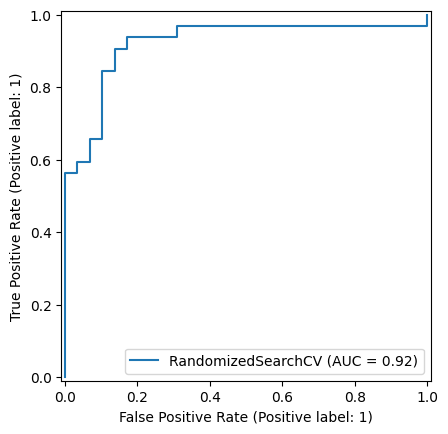

In [163]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rs_rf,X_test,y_test);

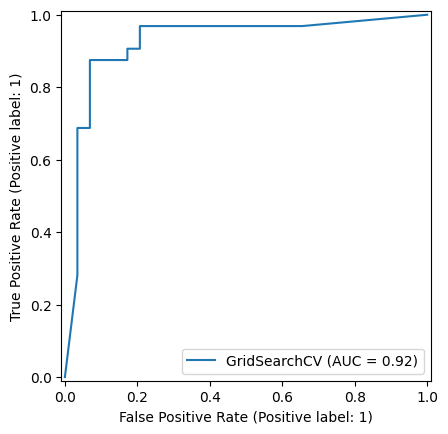

In [164]:
RocCurveDisplay.from_estimator(gs_knn,X_test,y_test);

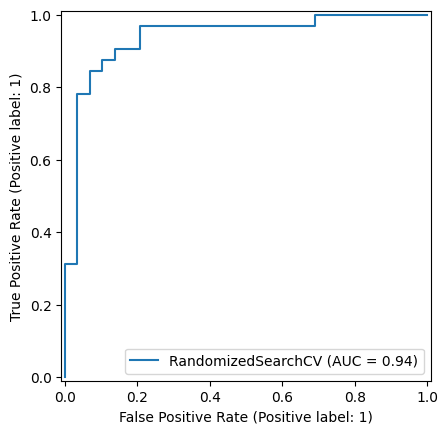

In [165]:
RocCurveDisplay.from_estimator(rs_log_reg,X_test,y_test);

Accuracy is misleading, what we should be focusing on here is precision and recall

In [166]:
#Classfication report for each model
from sklearn.metrics import classification_report

In [167]:
print(classification_report(y_test,y_preds_rf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [168]:
print(classification_report(y_test,y_preds_knn))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [169]:
print(classification_report(y_test,y_preds_lr))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



Knn looks to still be the better model witih a higher recall. That will be chosen now

In [170]:
import joblib
joblib.dump(gs_knn.best_estimator_,"gs_knn.joblib")

['gs_knn.joblib']

In [172]:
from google.colab import files
files.download("gs_knn.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
joblib.load("gs_knn.joblib").predict_proba(X_test)

array([[0.91565372, 0.08434628],
       [0.50848923, 0.49151077],
       [0.4035776 , 0.5964224 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.23897494, 0.76102506],
       [0.11825102, 0.88174898],
       [1.        , 0.        ],
       [0.9067773 , 0.0932227 ],
       [0.33016165, 0.66983835],
       [0.45079062, 0.54920938],
       [0.75407369, 0.24592631],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.91548816, 0.08451184],
       [1.        , 0.        ],
       [0.91650662, 0.08349338],
       [0.49998377, 0.50001623],
       [0.90678111, 0.09321889],
       [0.29825595, 0.70174405],
       [0.07895623, 0.92104377],
       [0.        , 1.        ],
       [0.54873615, 0.45126385],
       [0.        , 1.        ],
       [0.23697782, 0.76302218],
       [0.89795344, 0.10204656],
       [0.21222656, 0.78777344],
       [1.